# 通过控制不同的 w 和 b (单感知机 , 就是一个神经元) 能够组合出大部分的逻辑们

## 映入 w 权重表达这个神经元的占比力度
## 映入 b 来表达这个神经元的激活难度

# 局限 , 感知机无法实现 XOR , 简单来理解就是,单个感知机只能解决线性问题. 但是XOR来看的话 , 无法通过 b , w 的调整去划分 用一条直线解决的问题

# 感知机叠加

通过增加感知机的层数能够实现非线性变化.能够解决线性不可分的问题.多层感知机具有能够表达非常复杂的逻辑的能力



# 数据流向


神经元输入 -> ( 偏置 + 各个输入路线权重后的数值 -> 激活函数 ) -> 神经元输出 

上述的括号是一个神经元会隐藏的

# 激活函数

一般是,一旦输入超过某个阈值,就切换输出,这样的函数称之为 阶跃函数



In [2]:
# 构造一个阶跃函数
import numpy as np
def step_fun(x):
    y = x > 0 # to [T,T,F]
    y = y.astype(int) # 1,1,0
    return y

x = np.array([-1,-2,0,2,3])
step_fun(x)

array([0, 0, 0, 1, 1])

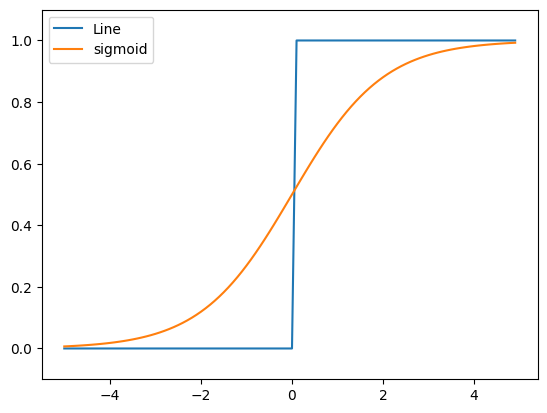

In [3]:
import matplotlib.pylab as plt
def step_fun(x):
    return np.array(x>0,dtype=int)

# draw the step activation function
x = np.arange(-5,5,0.1)
y = step_fun(x)
plt.plot(x,y,label="Line")
plt.ylim(-0.1,1.1)


def step_sigmoid(x):
    return 1 / (1 + np.exp(-x))

y1 = step_sigmoid(x)
plt.plot(x,y1,label="sigmoid")

plt.legend()
plt.show()

# ReLU 激活函数
https://blog.csdn.net/weixin_43486780/article/details/105478503

小于0 取0 , 大于0 取本身


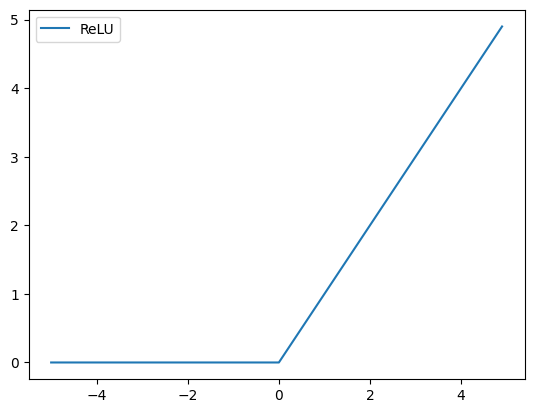

In [4]:
def ReLU(x):
    return np.maximum(0,x)

y2 = ReLU(x)
plt.plot(x,y2,label="ReLU")
plt.legend()
plt.show()

# 矩阵乘法




In [5]:
np1 = np.array([[1,2],[3,4]])
np2 = np.array([[5,6],[7,8]])

np.dot(np1, np2)


np1 = np.array([[1,2],
                [3,4],
                [5,6]])

np2 = np.array([[1,2],
                [3,2]])


np.dot(np1, np2)

array([[ 7,  6],
       [15, 14],
       [23, 22]])

# 神经网络和矩阵



In [6]:
input = np.array([1,3]) # 1,3
weights = np.array([[1,3,5],[2,4,6]])
print(weights) # [1,3,5] -> w1 , w2 , w3 # 这一层三个神经元对 x1 这个输入的权重

[[1 3 5]
 [2 4 6]]


# 构建 2 - 3 -2 - 2 神经网络

In [7]:


input = np.array([1.0,0.5])
L1W = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
L1B = np.array([0.1,0.2,0.3])
A1 = np.dot(input,L1W) + L1B
Z1 = step_sigmoid(A1)
print(A1,Z1) # A1 - hx > Z1 
L2W = np.array(([31,32],[41,42]))
L3W = np.array(([51,52],[53,54]))

[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


In [8]:
import torch

def init_network():
    network = {}

    network["W1"] = torch.rand(size=(2,3)).numpy()
    network["W2"] = torch.rand(size=(3,2)).numpy()
    network["W3"] = torch.rand(size=(2,2)).numpy()

    network['b1'] = torch.rand(size=(3,)).numpy()
    network['b2'] = torch.rand(size=(2,)).numpy()
    network['b3'] = torch.rand(size=(2,)).numpy()

    return network
def identity_function(input):
    # 恒等函数
    return input

def softmax_function(a):
    c = np.max(a)
    expa = np.exp(a - c)
    # overflow avoid
    sum_exp = np.sum(expa)
    y = expa / sum_exp
    return y


def forward(network,input):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(input,W1) + b1
    z1 = step_sigmoid(a1)

    a2 = np.dot(z1,W2) + b2
    z2 = step_sigmoid(a2)

    a3 = np.dot(z2,W3) + b3

    # y = identity_function(a3)
    y = softmax_function(a3)
    return y 

input = [1,4]
network = init_network()
output = forward(network,input)
print(output)

[0.54575883 0.45424117]


In [9]:
array = np.array([1,2,3])
arrayMaxIndex = np.argmax(array) 
arrayMaxIndex

2

# 正则化 , 预处理
把数据规范到某一个范围的这个动作就是正则化 ,然后对神经网络的输入,比如说图片的flatten 就是预处

# batch 处理

就是对input进行批量输入,比如说神经元是 700 个输入,然后直接放 100 x 700 的矩阵 ,通过神经网络输入比如说 是 50 那么最好的输出矩阵就是 100 x 50

100 x 700 - 700 x 50 -> 50 x100 -> 100 x 50 -> 50

In [10]:
# axis=0 |
# axis=1 --

x = np.array([[0.1,0.2,0.4],[0.4,0.5,0.6]])
xargMax0 = np.argmax(x, axis=0) # [1,1,1]
xargMax1 = np.argmax(x, axis=1) # [2,2]
xargMax0,xargMax1

(array([1, 1, 1], dtype=int64), array([2, 2], dtype=int64))